# Project "Megaline"  

## Prepaid plans description
### Surf
Monthly charge: $20

500 monthly minutes, 50 SMS and 15 GB of web traffic

After exceeding the package limits: 
1. 1 minute: 3 cents ("Megaline" always rounds up the minute and megabyte values. 
If the call lasted just one second, it will be counted as one minute); 
2. SMS: 3 cents; 
3. 1 GB of web traffic: $10.

### Ultimate
Monthly charge: $70

3000 monthly minutes, 
1000 SMS and 30 GB of web traffic

After exceeding the package limits: 
1. 1 minute: 1 cent; 
2. SMS: 1 cent; 
3. 1 GB of web traffic: $7.


# Table of contents:

* [Step 1. Open the data file and study the general information](#1)
    * [ Summary](#2)
* [Step 2. Prepare the data](#3)
* [Step 3. Analyse the data](#4)
* [Step 4. Test the hypotheses](#5)
* [Summary](#6)


# Step 1. Open the data file and study the general information <a class="anchor" id="1"></a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


Open the data file and study the general information

In [2]:
calls = pd.read_csv('/Users/mariashemyakina/Downloads/megaline_calls.csv')
internet = pd.read_csv('/Users/mariashemyakina/Downloads/megaline_internet.csv')
sms = pd.read_csv('/Users/mariashemyakina/Downloads/megaline_messages.csv')
tariff = pd.read_csv('/Users/mariashemyakina/Downloads/megaline_tariffs.csv')
users = pd.read_csv('/Users/mariashemyakina/Downloads/megaline_users.csv')


In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
tariff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
tariff_name              2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


# Step 2. Prepare the data <a class="anchor" id="3"></a>


###  Calls 

In [8]:
calls.sample(15)

,id,user_id,call_date,duration
4213,1017_183,1017,2018-09-22,0.00
105060,1370_145,1370,2018-10-20,13.13
116918,1408_567,1408,2018-03-08,7.47
118917,1414_215,1414,2018-10-29,6.24
115787,1406_13,1406,2018-11-04,6.89
96248,1341_263,1341,2018-12-29,3.07
115734,1405_177,1405,2018-07-18,13.43
108354,1382_1657,1382,2018-10-15,0.00
4730,1021_306,1021,2018-12-24,17.16
28205,1106_629,1106,2018-10-23,0.00


We can see the zero duration of calls. We'll need to think about what to do with this data. It is also better to round up the duration. Let's do it

In [9]:
calls['duration'] = np.ceil(calls['duration'])

In [10]:
calls.sample(15)

,id,user_id,call_date,duration
77866,1278_348,1278,2018-12-19,5.0
42661,1156_266,1156,2018-04-24,1.0
7260,1033_276,1033,2018-10-05,4.0
82499,1299_157,1299,2018-12-30,6.0
46382,1167_465,1167,2018-07-29,7.0
131047,1470_496,1470,2018-07-15,2.0
74183,1263_167,1263,2018-04-19,11.0
40524,1149_212,1149,2018-11-08,6.0
14003,1059_225,1059,2018-10-04,7.0
27202,1102_52,1102,2018-12-11,7.0


Let's see what percentage of zero calls we have

In [11]:
calls_counts = calls[calls['duration'] <= 0].shape[0]
print("calls: {}\t Zero calls percentage: {:.1%}"
      .format(calls_counts, calls_counts/calls.shape[0]))

calls: 26834	 Zero calls percentage: 19.5%


Zero calls still are calls, and they percentage is quite high, so we need to replace (round) them to 1 minute

In [12]:
calls['duration'] = calls['duration'].where(calls['duration'] != 0, 1)

In [13]:
calls_counts = calls[calls['duration'] <= 0].shape[0]
print("calls: {}\t Zero calls percentage: {:.1%}"
      .format(calls_counts, calls_counts/calls.shape[0]))

calls: 0	 Zero calls percentage: 0.0%


In [14]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,7.341496
std,139.416268,5.728989
min,1000.000000,1.000000
25%,1128.000000,2.000000
50%,1247.000000,6.000000
75%,1365.000000,11.000000
max,1499.000000,38.000000


In [15]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


We see that the call_date and id formats are of the object type, they should be of the datetime and int formats, respectively

In [16]:
#calls['id'] = calls['id'].astype('int16')
calls['duration'] = calls['duration'].astype('int16')

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null int16
dtypes: datetime64[ns](1), int16(1), int64(1), object(1)
memory usage: 3.4+ MB


In [19]:
calls.duplicated().sum()

0

In [20]:
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

### Internet

In [21]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [22]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [23]:
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [24]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


We can see the zeros in mb_used . It is also better to round up the mb_used. Let's do it

In [25]:
internet['mb_used'] = np.ceil(internet['mb_used'])


Let's convert to the right types

In [26]:
#internet['id'] = internet['id'].astype('int16')

In [27]:
internet['mb_used'] = internet['mb_used'].astype('int16')

In [28]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [29]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null int16
dtypes: datetime64[ns](1), int16(1), int64(1), object(1)
memory usage: 2.6+ MB


Zero mb_used percentage

In [30]:
mb_counts = internet[internet['mb_used'] <= 0].shape[0]
print("mb_used: {}\t Zero mb_used percentage: {:.1%}"
      .format(mb_counts, mb_counts/internet.shape[0]))

mb_used: 13747	 Zero mb_used percentage: 13.1%


Zero traffic also means entering the network, so it should be rounded (replaced) to 1. Round the used megabytes up and check the success of the replacement

In [31]:
internet['mb_used'] = internet['mb_used'].where(internet['mb_used'] != 0, 1)

In [32]:
mb_counts = internet[internet['mb_used'] <= 0].shape[0]
print("mb_used: {}\t Zero mb_used percentage: {:.1%}"
      .format(mb_counts, mb_counts/internet.shape[0]))

mb_used: 0	 Zero mb_used percentage: 0.0%


In [33]:
internet.duplicated().sum()

0

### SMS

In [34]:
sms.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [35]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [36]:
sms['message_date'] = pd.to_datetime(sms['message_date'], format='%Y-%m-%d')

In [37]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [38]:
sms.duplicated().sum()

0

### Tariff

In [39]:
tariff.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [40]:
tariff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
tariff_name              2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


### Users

In [41]:
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
173,1173,Tristan,Cain,27,"Oxnard-Thousand Oaks-Ventura, CA MSA",2018-09-28,surf,NaN
207,1207,Samuel,Porter,63,"Omaha-Council Bluffs, NE-IA MSA",2018-12-22,surf,NaN
65,1065,Sherlyn,Noel,26,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-08-03,surf,NaN
433,1433,Lyndon,Morrison,29,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-29,ultimate,NaN
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaN
99,1099,Shavon,Banks,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-26,surf,NaN
401,1401,Charmain,Bryant,67,"Richmond, VA MSA",2018-08-24,ultimate,NaN
368,1368,Enola,Ray,60,"Pittsburgh, PA MSA",2018-05-20,ultimate,NaN
366,1366,Rod,Huff,62,"Cincinnati, OH-KY-IN MSA",2018-07-30,surf,NaN
16,1016,Jann,Salinas,30,"Fresno, CA MSA",2018-10-25,surf,NaN


In [42]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


We see a large number of NaN in churn_date and the object format instead of datetime, the reg_date format is also object instead of datetime

In [43]:
users.duplicated().sum()

0

In [44]:
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
tariff          0
churn_date    466
dtype: int64

In [45]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [46]:
users['churn_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [47]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
churn_date    500 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Pre Summary .  <a class="anchor" id="2"></a>
The first inspection of the data showed that we have zeros in the duration of calls and megabytes. Otherwise, the data looks quite normal. Only the churn date  has any Nans. We also changed the type of some data. All dataframes must be grouped into one.

Creating separate month columns for grouping and changing the data type

In [48]:
internet['month'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d').dt.month.astype('int16')

In [49]:
sms['month'] = pd.to_datetime(sms['message_date'], format='%Y-%m-%d').dt.month.astype('int16')

In [50]:
calls['month'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d').dt.month.astype('int16')

### Creating a new dataframe, where we collect the volume of Internet traffic spent by month, grouped by user_id

In [51]:
internet_group = internet\
                            .groupby(['user_id','month'])\
                            .agg({'mb_used':'sum'})\
                            .reset_index()
                            

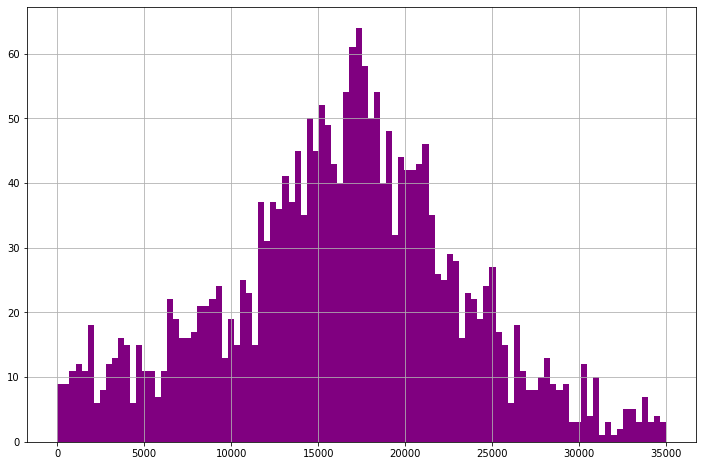

In [52]:
internet_group['mb_used'].hist(bins = 100, figsize = (12,8),  grid = True, range = (0, 35000), color = 'purple') 

In [53]:
internet_group.head()

,user_id,month,mb_used
0,1000,12,1904.0
1,1001,8,6933.0
2,1001,9,13346.0
3,1001,10,22364.0
4,1001,11,18527.0


In [54]:
internet_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
user_id    2277 non-null int64
month      2277 non-null int64
mb_used    2277 non-null float64
dtypes: float64(1), int64(2)
memory usage: 53.5 KB


### Creating a new dataframe, where we collect the number of sent messages by month, grouped by user_id

In [55]:
sms_group = sms\
                .groupby(['user_id', 'month'])\
                .agg({'id': 'count'})\
                .reset_index()\
                .rename(columns={'id':'sms_count'})

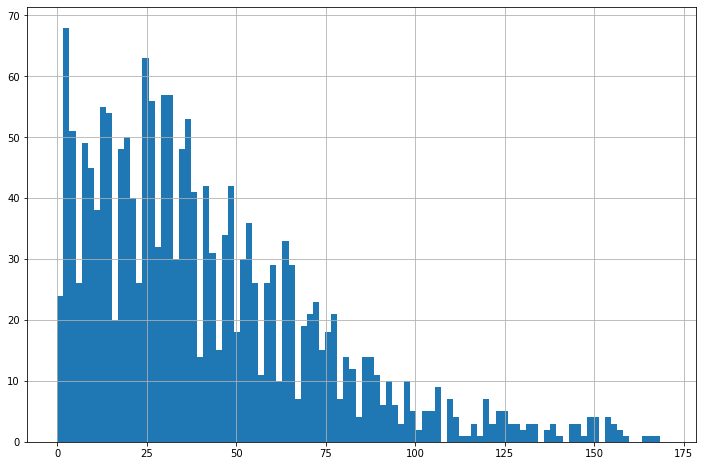

In [56]:
sms_group['sms_count'].hist(bins = 100, figsize = (12,8), range = (0,170), grid = True) 

In [57]:
sms_group.head()

,user_id,month,sms_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [58]:
sms_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
user_id      1806 non-null int64
month        1806 non-null int64
sms_count    1806 non-null int64
dtypes: int64(3)
memory usage: 42.5 KB


### Let's create a new dataframe, where we will collect the number of calls made and minutes of conversation spent by month per month, grouped by user_id

In [59]:
calls_group = calls\
                    .groupby(['month','user_id'])\
                    .agg({'id':'count','duration':'sum'})\
                    .reset_index()\
                    .rename(columns = {'id':'call_count','duration':'call_duration'})




In [60]:
calls_group.sample(5)

,month,user_id,call_count,call_duration
446,7,1187,78,578
579,8,1056,48,355
88,4,1203,73,586
840,9,1110,64,495
604,8,1103,25,171


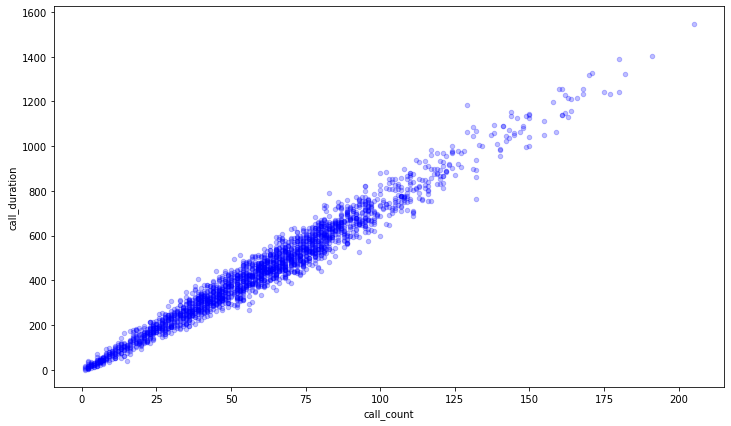

In [61]:
calls_group.plot(x='call_count', y = 'call_duration', kind = 'scatter', alpha = 0.25, color = 'b', figsize = (12,7))

In [62]:
calls_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 4 columns):
month            2258 non-null int64
user_id          2258 non-null int64
call_count       2258 non-null int64
call_duration    2258 non-null int16
dtypes: int16(1), int64(3)
memory usage: 57.5 KB


### To make it easier to operate with data, we need to create a new empty dataframe, in which we will combine all our data. Enter a range of 12 months for each user_id in this dataframe

In [63]:
temp_df = pd.DataFrame({'month': range(1,13),'index_temp':0})

In [64]:
temp_df.head(13)

,month,index_temp
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


Creating a temporary index column to combine an empty dataframe with the user table

In [65]:
users['index_temp'] = 0


Let's put our dataframe together

In [66]:
df = temp_df.merge(users, how='outer', on='index_temp')


In [67]:
df.head()

,month,index_temp,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1,0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-24
1,1,0,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-08-13
2,1,0,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-10-21
3,1,0,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-01-28
4,1,0,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-05-23


Let's check that each user has information for 12 months

In [68]:
df.shape[0]/12 == users.shape[0]

True

In [69]:
df.sort_values(['user_id','month']).sample(10)

,month,index_temp,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
2441,5,0,1441,Piedad,Myers,23,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-08,ultimate,2018-03-08
3072,7,0,1072,Seymour,Spence,66,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-12,surf,2018-07-12
1826,4,0,1326,Johnathon,Branch,21,"Greensboro-High Point, NC MSA",2018-02-06,surf,2018-02-06
117,1,0,1117,Hank,Taylor,49,"Dallas-Fort Worth-Arlington, TX MSA",2018-01-24,surf,2018-01-24
1835,4,0,1335,Gail,Coleman,61,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-02,surf,2018-06-02
3893,8,0,1393,Wilfredo,Rosa,44,"Knoxville, TN MSA",2018-10-29,surf,2018-10-29
1811,4,0,1311,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,2018-06-27
4045,9,0,1045,Barney,Ortega,20,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-10-15,surf,2018-10-15
4530,10,0,1030,Chase,Kane,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-02-14,ultimate,2018-02-14
4364,9,0,1364,Clarine,Bonner,75,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-08-09,surf,2018-08-09


Column index_temp we no longer need, you can get rid of it. Then we will check the success of the replacement

In [70]:
df.drop(['index_temp'], axis =1, inplace = True)


In [71]:
df.sort_values(['user_id','month']).head()

,month,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-24
500,2,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-24
1000,3,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-24
1500,4,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-24
2000,5,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-24


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 9 columns):
month         6000 non-null int64
user_id       6000 non-null int64
first_name    6000 non-null object
last_name     6000 non-null object
age           6000 non-null int64
city          6000 non-null object
reg_date      6000 non-null datetime64[ns]
tariff        6000 non-null object
churn_date    6000 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 468.8+ KB


### Now add to this table the data on Internet traffic, according to reports, dates of connection and disconnection and calls

In [73]:
df['month_in'] = df['reg_date'].dt.month

In [74]:
df['month_out'] = df['churn_date'].dt.month

In [75]:
df = df.merge(internet_group, on=['user_id','month'], how='left')

In [76]:
df = df.merge(sms_group, on=['user_id','month'], how='left')

In [77]:
df = df.merge(calls_group, on = ['user_id','month'], how='left')

In [78]:
tariff = tariff.rename(columns={'tariff_name':'tariff'})

In [79]:
df = df.merge(tariff, on='tariff', how='outer')

In [80]:
df.sample(6)

,month,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month_in,...,sms_count,call_count,call_duration,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
5413,11,1136,Jasper,Caldwell,25,"Knoxville, TN MSA",2018-10-14,surf,2018-10-14,10,...,42.0,64.0,519.0,50,15360,500,20,10,0.03,0.03
3634,6,1010,Wilber,Blair,52,"Dallas-Fort Worth-Arlington, TX MSA",2018-03-09,surf,2018-03-09,3,...,NaN,77.0,569.0,50,15360,500,20,10,0.03,0.03
3629,6,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-01-28,1,...,NaN,NaN,NaN,50,15360,500,20,10,0.03,0.03
183,2,1061,Maryam,Valencia,38,"Columbia, SC MSA",2018-03-08,ultimate,2018-03-08,3,...,NaN,NaN,NaN,1000,30720,3000,70,7,0.01,0.01
2154,1,1321,Karlyn,Jimenez,19,"North Port-Sarasota-Bradenton, FL MSA",2018-05-31,surf,2018-05-31,5,...,NaN,NaN,NaN,50,15360,500,20,10,0.03,0.03
4750,9,1153,Kathaleen,Crawford,30,"Bridgeport-Stamford-Norwalk, CT MSA",2018-06-19,surf,2018-06-19,6,...,NaN,72.0,596.0,50,15360,500,20,10,0.03,0.03


In [81]:
df.isnull().sum()

month                       0
user_id                     0
first_name                  0
last_name                   0
age                         0
city                        0
reg_date                    0
tariff                      0
churn_date                  0
month_in                    0
month_out                   0
mb_used                  3723
sms_count                4194
call_count               3742
call_duration            3742
messages_included           0
mb_per_month_included       0
minutes_included            0
usd_monthly_pay             0
usd_per_gb                  0
usd_per_message             0
usd_per_minute              0
dtype: int64

We see a large number of NaNs in mb_used, call_count, sms_count, call_duration. Most likely, this indicates that the person did not use the phone at all during this month.  The number of missed calls and their duration is the same, so we can replace this data with zero.

In [82]:
df['call_count'].fillna(0, inplace = True)



In [83]:
df['call_duration'].fillna(0, inplace = True)

In [84]:
df['sms_count'].fillna(0, inplace = True)

In [85]:
df['mb_used'].fillna(0, inplace = True)

In [86]:
df.isnull().sum()

month                    0
user_id                  0
first_name               0
last_name                0
age                      0
city                     0
reg_date                 0
tariff                   0
churn_date               0
month_in                 0
month_out                0
mb_used                  0
sms_count                0
call_count               0
call_duration            0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 22 columns):
month                    6000 non-null int64
user_id                  6000 non-null int64
first_name               6000 non-null object
last_name                6000 non-null object
age                      6000 non-null int64
city                     6000 non-null object
reg_date                 6000 non-null datetime64[ns]
tariff                   6000 non-null object
churn_date               6000 non-null datetime64[ns]
month_in                 6000 non-null int64
month_out                6000 non-null int64
mb_used                  6000 non-null float64
sms_count                6000 non-null float64
call_count               6000 non-null float64
call_duration            6000 non-null float64
messages_included        6000 non-null int64
mb_per_month_included    6000 non-null int64
minutes_included         6000 non-null int64
usd_monthly_pay          6000 non-null int64
usd_per_

In [88]:
df['sms_count'] = df['sms_count'].astype('int16')

In [89]:
df['call_count'] = df['call_count'].astype('int16')

In [90]:
df['call_duration'] = df['call_duration'].astype('int16')

In [91]:
df['mb_used'] = df['mb_used'].astype('int16')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 22 columns):
month                    6000 non-null int64
user_id                  6000 non-null int64
first_name               6000 non-null object
last_name                6000 non-null object
age                      6000 non-null int64
city                     6000 non-null object
reg_date                 6000 non-null datetime64[ns]
tariff                   6000 non-null object
churn_date               6000 non-null datetime64[ns]
month_in                 6000 non-null int64
month_out                6000 non-null int64
mb_used                  6000 non-null int16
sms_count                6000 non-null int16
call_count               6000 non-null int16
call_duration            6000 non-null int16
messages_included        6000 non-null int64
mb_per_month_included    6000 non-null int64
minutes_included         6000 non-null int64
usd_monthly_pay          6000 non-null int64
usd_per_gb      

###  Calculate the monthly revenue from each user

In [93]:

import math
# For the calculation we need the following columns
cols = [
    'mb_used', 'call_duration', 'sms_count',
    'messages_included', 'mb_per_month_included', 'minutes_included',
    'usd_per_gb', 'usd_per_message', 'usd_per_minute',
    'rub_monthly_fee'
]

# Let's calculate how much users spent over the limit
df['paid_minutes'] = df['call_duration'] - df['minutes_included']
df['paid_messages'] = df['sms_count'] - df['messages_included']
df['paid_mb'] = df['mb_used'] - df['mb_per_month_included']

# If the value is negative, replace 0
for col in ['paid_messages', 'paid_minutes', 'paid_mb', 'mb_used', 'sms_count', 'call_duration' ]:
    df.loc[df[col] < 0, col] = 0
    
# Calculate revenue for minutes of conversation, messages, and the Internet
df['cost_minutes'] = df['paid_minutes'] * df['usd_per_minute']
df['cost_messages'] = df['paid_messages'] * df['usd_per_message']
df['cost_gb'] = (df['paid_mb'] / 1024).apply(math.ceil) * df['usd_per_gb']

# Calculate revenue based on the subscription fee
df['total_cost'] = df['usd_monthly_pay'] + df['cost_minutes'] + df['cost_messages'] + df['cost_gb']

In [94]:
df.sample(10).T

,4562,2457,1194,946,3871,4206,89,4826,44,1089
month,8,2,8,6,6,7,1,9,1,7
user_id,1365,1271,1214,1451,1348,1342,1282,1265,1135,1405
first_name,Milford,Darrin,Emil,Lenard,Carl,Eugene,Annice,Alec,Scotty,Shella
last_name,Rush,Rose,Robles,Harding,Rutledge,Patton,Calhoun,Henry,White,Hunter
age,19,48,34,53,60,65,61,29,51,34
city,"Grand Rapids-Kentwood, MI MSA","New York-Newark-Jersey City, NY-NJ-PA MSA","San Francisco-Oakland-Berkeley, CA MSA","Charlotte-Concord-Gastonia, NC-SC MSA","Detroit-Warren-Dearborn, MI MSA","Indianapolis-Carmel-Anderson, IN MSA","San Francisco-Oakland-Berkeley, CA MSA","Washington-Arlington-Alexandria, DC-VA-MD-WV MSA","Miami-Fort Lauderdale-West Palm Beach, FL MSA","Indianapolis-Carmel-Anderson, IN MSA"
reg_date,2018-02-09 00:00:00,2018-06-24 00:00:00,2018-01-01 00:00:00,2018-02-15 00:00:00,2018-10-05 00:00:00,2018-10-21 00:00:00,2018-11-01 00:00:00,2018-11-23 00:00:00,2018-12-23 00:00:00,2018-06-22 00:00:00
tariff,surf,surf,ultimate,ultimate,surf,surf,ultimate,surf,ultimate,ultimate
churn_date,2018-02-09 00:00:00,2018-06-24 00:00:00,2018-01-01 00:00:00,2018-02-15 00:00:00,2018-10-05 00:00:00,2018-10-21 00:00:00,2018-11-01 00:00:00,2018-11-23 00:00:00,2018-12-23 00:00:00,2018-06-22 00:00:00
month_in,2,6,1,2,10,10,11,11,12,6


Let's look at the median and average revenue for fares

In [95]:

df.groupby('tariff')['total_cost'].mean()

tariff
surf        32.941055
ultimate    70.047101
Name: total_cost, dtype: float64

In [96]:
df.groupby('tariff')['total_cost'].median()

tariff
surf        20.0
ultimate    70.0
Name: total_cost, dtype: float64

### Let's build a boxplot  by revenue depending on the tariff

Text(0.5, 1.0, 'Revenue schedule in the context of two tariffs')

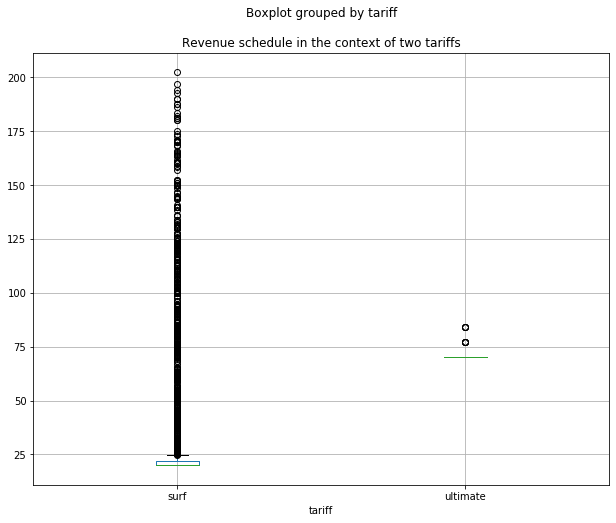

In [97]:

df.boxplot('total_cost', by ='tariff', figsize=(10,8))
plt.title(u'Revenue schedule in the context of two tariffs')

Despite the fact that the Surf tariff is cheaper, it has more emissions. It is necessary to get rid of emissions and then the picture will become clearer.

### Get rid of it. 

To do this, I use the interquartile range, which I will apply to the sms_count, mb_used, and call_duration columns 
I will delete emissions separately for each column according to the tariffs

In [98]:
def outlier(df, column,graphic=0,x=8,y=8):
    
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
     
    iqr = q3 - q1
    
    filter = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[filter].boxplot([column], figsize=(x,y))
    else:
        return df.loc[filter]

Now let's look at the rates and remove the emissions

In [99]:
surf_outlier = df[df['tariff']=='surf']
surf_outlier = outlier(surf_outlier,'sms_count',0)

for feature in ['mb_used','call_duration']:
    surf_outlier = outlier(surf_outlier,feature,0)


In [100]:
ultimate_outlier = df[df['tariff']=='ultimate']
ultimate_outlier = outlier(ultimate_outlier,'sms_count',0)

for feature in ['mb_used','call_duration']:
    ultimate_outlier = outlier(ultimate_outlier,feature,0)



In [101]:
df.head(4).T

,0,1,2,3
month,1,1,1,1
user_id,1000,1006,1008,1011
first_name,Anamaria,Jesusa,Emely,Halina
last_name,Bauer,Bradford,Hoffman,Henry
age,45,73,53,73
city,"Atlanta-Sandy Springs-Roswell, GA MSA","San Francisco-Oakland-Berkeley, CA MSA","Orlando-Kissimmee-Sanford, FL MSA","Cleveland-Elyria, OH MSA"
reg_date,2018-12-24 00:00:00,2018-11-27 00:00:00,2018-08-03 00:00:00,2018-01-18 00:00:00
tariff,ultimate,ultimate,ultimate,ultimate
churn_date,2018-12-24 00:00:00,2018-11-27 00:00:00,2018-08-03 00:00:00,2018-01-18 00:00:00
month_in,12,11,8,1


# Step 3. Analyse the data <a class="anchor" id="4"></a>


Describe the clients' behavior. For the users of each of the plans, find the number of minutes and SMS and the volume of web traffic they require per month. Calculate the mean, variance and standard deviation. Plot histograms. Describe the distributions.

Let's determine how many minutes of conversation, how many messages, and how much Internet traffic users need for each tariff per month

In [102]:
df.median()

month                        6.50
user_id                   1249.50
age                         46.00
month_in                     6.00
month_out                    6.00
mb_used                      0.00
sms_count                    0.00
call_count                   0.00
call_duration                0.00
messages_included           50.00
mb_per_month_included    15360.00
minutes_included           500.00
usd_monthly_pay             20.00
usd_per_gb                  10.00
usd_per_message              0.03
usd_per_minute               0.03
paid_minutes                 0.00
paid_messages                0.00
paid_mb                      0.00
cost_minutes                 0.00
cost_messages                0.00
cost_gb                      0.00
total_cost                  20.78
dtype: float64

In [103]:
df.mean()

month                        6.500000
user_id                   1249.500000
age                         45.486000
month_in                     6.290000
month_out                    6.290000
mb_used                   5889.065833
sms_count                   12.675167
call_count                  22.955833
call_duration              168.530167
messages_included          355.900000
mb_per_month_included    20305.920000
minutes_included          1305.000000
usd_monthly_pay             36.100000
usd_per_gb                   9.034000
usd_per_message              0.023560
usd_per_minute               0.023560
paid_minutes                17.796000
paid_messages                1.838500
paid_mb                    764.239167
cost_minutes                 0.533880
cost_messages                0.055155
cost_gb                      8.200167
total_cost                  44.889202
dtype: float64

Look at the length of conversations in terms of rates, as well as the variance and standard deviation

In [104]:
df\
    .groupby('tariff')\
    .agg({'call_duration':['mean', 'median','var','std']})\
    .style.format("{:.2f}")

Text(0.5, 1.0, 'duration of calls in the surf tariff')

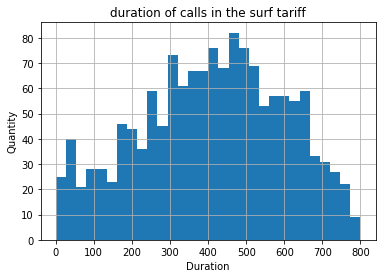

In [105]:
df[df['tariff']=='surf']['call_duration'].hist(bins=30, range = (1,800))
plt.xlabel('Duration')
plt.ylabel('Quantity')
plt.title('duration of calls in the surf tariff')

Text(0.5, 1.0, 'duration of calls in the ultimate tariff')

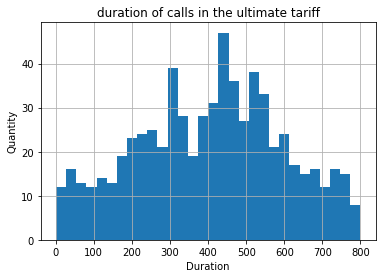

In [106]:
df[df['tariff']=='ultimate']['call_duration'].hist(bins=30, range = (1,800))
plt.xlabel('Duration')
plt.ylabel('Quantity')
plt.title('duration of calls in the ultimate tariff')

Let's determine the number of messages that users of the surf and ultimate fare need, as well as the variance and standard deviation

In [107]:
df\
    .groupby('tariff')\
    .agg({'sms_count':['mean','median','var','std']})\
    .style.format("{:.2f}")

Text(0.5, 1.0, 'Quantity of sms in the ultimate tariff')

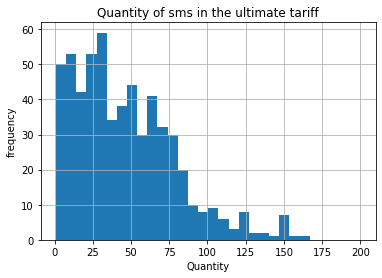

In [108]:
df[df['tariff']=='ultimate']['sms_count'].hist(bins=30, range = (1,200))
plt.xlabel('Quantity')
plt.ylabel('frequency')
plt.title('Quantity of sms in the ultimate tariff')

Text(0.5, 1.0, 'Quantity of sms in the surf tariff')

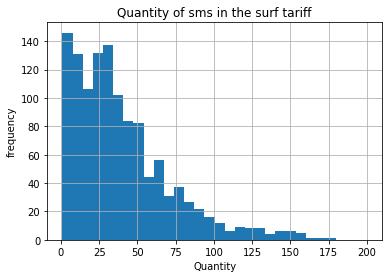

In [109]:
df[df['tariff']=='surf']['sms_count'].hist(bins=30, range = (1,200))
plt.xlabel('Quantity')
plt.ylabel('frequency')
plt.title('Quantity of sms in the surf tariff')

We can clearly see that ultimate's users need more text messages))

Let's determine the amount of traffic that users of the surf and ultimate fare need, as well as the variance and standard deviation

In [110]:
df\
    .groupby('tariff')\
    .agg({'mb_used':['median','mean','var','std']})\
    .style.format("{:.2f}")

Text(0.5, 1.0, 'Quantity mb in surf')

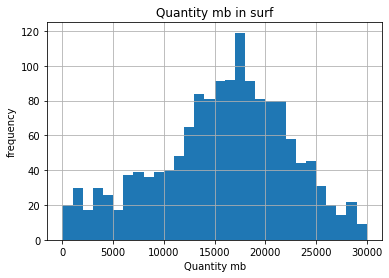

In [111]:
df[df['tariff']=='surf']['mb_used'].hist(bins=30, range = (1,30000))
plt.xlabel('Quantity mb')
plt.ylabel('frequency')
plt.title('Quantity mb in surf')

Text(0.5, 1.0, 'Quantity mb in ultimate')

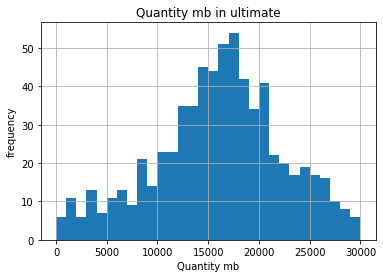

In [112]:
df[df['tariff']=='ultimate']['mb_used'].hist(bins=30, range=(1,30000))
plt.xlabel('Quantity mb')
plt.ylabel('frequency')
plt.title('Quantity mb in ultimate')

In [113]:
df.describe()

,month,user_id,age,month_in,month_out,mb_used,sms_count,call_count,call_duration,messages_included,...,usd_per_gb,usd_per_message,usd_per_minute,paid_minutes,paid_messages,paid_mb,cost_minutes,cost_messages,cost_gb,total_cost
count,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,6.50000,1249.500000,45.486000,6.290000,6.290000,5889.065833,12.675167,22.955833,168.530167,355.900000,...,9.034000,0.023560,0.023560,17.796000,1.838500,764.239167,0.533880,0.055155,8.200167,44.889202
std,3.45234,144.349308,16.956701,3.435093,3.435093,8752.170548,26.519123,35.400736,261.443358,443.917823,...,1.401846,0.009346,0.009346,74.255727,10.433563,2355.177633,2.227672,0.313007,24.457006,30.084258
min,1.00000,1000.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000,...,7.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,3.75000,1124.750000,30.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,50.000000,...,7.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,6.50000,1249.500000,46.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,50.000000,...,10.000000,0.030000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.780000
75%,9.25000,1374.250000,61.000000,9.000000,9.000000,13567.750000,12.000000,46.000000,336.000000,1000.000000,...,10.000000,0.030000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
max,12.00000,1499.000000,75.000000,12.000000,12.000000,32651.000000,266.000000,205.000000,1548.000000,1000.000000,...,10.000000,0.030000,0.030000,1048.000000,216.000000,17244.000000,31.440000,6.480000,170.000000,202.260000


## Step 4. Test the hypotheses <a class="anchor" id="5"></a>

The company earns different amounts from the Ultimate and Surf plans (measured in terms of average monthly revenue)
Average monthly revenue from users in the NY-NJ area differs from that in other regions.
Assign the threshold alpha value independently.


In [114]:
df.head()

,month,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month_in,...,usd_per_gb,usd_per_message,usd_per_minute,paid_minutes,paid_messages,paid_mb,cost_minutes,cost_messages,cost_gb,total_cost
0,1,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-24,12,...,7,0.01,0.01,0,0,0,0.0,0.0,0,70.0
1,1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-11-27,11,...,7,0.01,0.01,0,0,0,0.0,0.0,0,70.0
2,1,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-08-03,8,...,7,0.01,0.01,0,0,0,0.0,0.0,0,70.0
3,1,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,2018-01-18,1,...,7,0.01,0.01,0,0,0,0.0,0.0,0,70.0
4,1,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,2018-12-01,12,...,7,0.01,0.01,0,0,0,0.0,0.0,0,70.0


In [115]:
df.head(2).T

,0,1
month,1,1
user_id,1000,1006
first_name,Anamaria,Jesusa
last_name,Bauer,Bradford
age,45,73
city,"Atlanta-Sandy Springs-Roswell, GA MSA","San Francisco-Oakland-Berkeley, CA MSA"
reg_date,2018-12-24 00:00:00,2018-11-27 00:00:00
tariff,ultimate,ultimate
churn_date,2018-12-24 00:00:00,2018-11-27 00:00:00
month_in,12,11


Let's test the hypothesis that the average revenue of users of the "ultimate" and "surf" fares differ
If the distributions are normal, we can form H0 and H1 and define p-value 

Let's check how the total_cost data is distributed in surf and ultimate fares

Text(0.5, 1.0, 'Revenue distribution for the  ultimate')

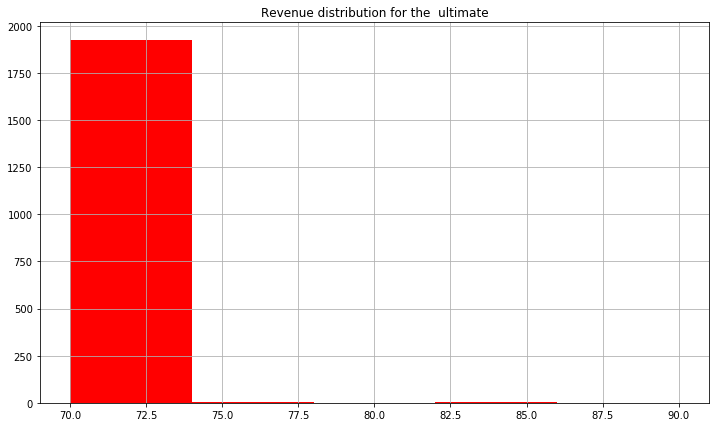

In [116]:
df[df['tariff']=='ultimate']['total_cost'].hist(bins=5, range = (70,90), figsize = (12,7), color = 'r' )
plt.title('Revenue distribution for the  ultimate')

Text(0.5, 1.0, 'Revenue distribution for the  surf')

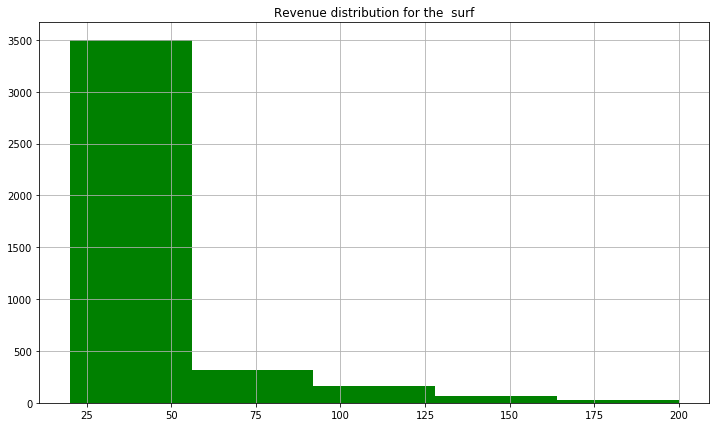

In [117]:
df[df['tariff']=='surf']['total_cost'].hist(bins=5, range = (20,200), figsize = (12,7), color = 'g' )
plt.title('Revenue distribution for the  surf')

Let's start with the formulation of the null hypothesis H0.

H0: M(surf) = M(ultimate)

An alternative hypothesis would then be

H1: M(surf) != M(ultimate)

In [118]:
from scipy import stats as st

def test(df1, df2):
    alpha = .05
    
    results = st.ttest_ind(df1,df2)
    
    if (results.pvalue < alpha):
        return(print("Rejecting the null hypothesis" ))
    else:
        return(print("We can't rejecting the null hypothesis" ))

In [119]:
ultimate = df[df['tariff']=='ultimate']['total_cost']
surf = df[df['tariff']=='surf']['total_cost']
test(ultimate, surf)

Rejecting the null hypothesis


In [120]:
print('Average revenue in the surf:',round(surf.mean()),'usd')
print('Average revenue in the ultimate:',round(ultimate.mean()),'usd')

Average revenue in the surf: 33 usd
Average revenue in the ultimate: 70 usd


Revenue in the ultimate  is higher than in the surf

### Let's check the hypothesis that average monthly revenue from users in the NY-NJ area differs from that in other regions

In [121]:
df.city.unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Nashville-Davidson–Murfreesboro–Franklin, TN MSA',
       'Columbus, OH MSA', 'Las Vegas-Henderson-Paradise, NV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA',
       'Miami-Fort Lauderdale-West Palm Beach, FL MSA',
       'Columbia, SC MSA', 'San Antonio-New Braunfels, TX MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Phoenix-Mesa-Chandler, AZ MSA',
       'Riverside-San Bernardino-Ontario, CA MSA',
       'Salt Lake City, 

Replace all cities except New York-Newark-Jersey City with "Other" and add this column to the dataframe 

In [122]:
df['region'] = np.where(df.city == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'NY-NJ', 'Other')

In [123]:
df['region'].unique()

array(['Other', 'NY-NJ'], dtype=object)

In [124]:
nyc = df.query('region == "NY-NJ"')['total_cost']
regions= df.query('region == "Other"')['total_cost']

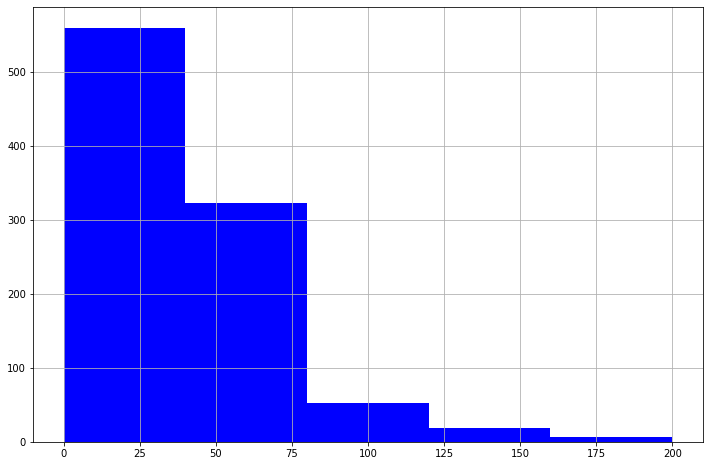

In [125]:
nyc.hist( bins = 5, range = (0,200), grid = True, color = 'b', figsize = (12,8))

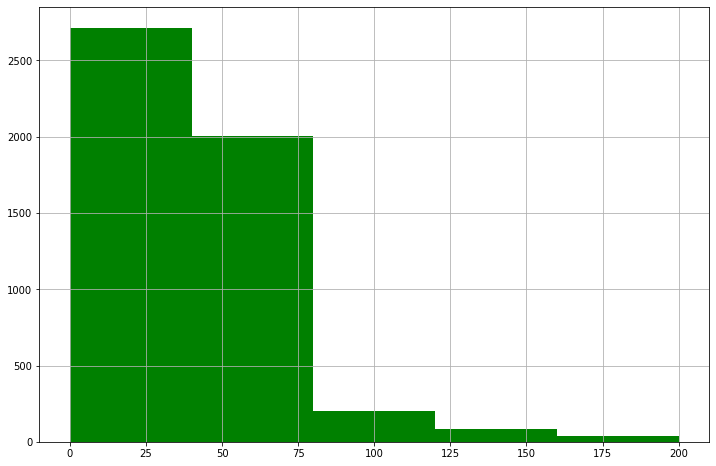

In [126]:
regions.hist( bins = 5, range = (0,200), grid = True, color = 'g', figsize = (12,8))

Using the created function, we will check the null and alternative hypothesis.

Let the null hypothesis be

H0: N (NY-NJ) = N (Other regions)

 Then the alternative will be as follows
 
H1: N(NY-NJ)!= N(Other regions)

In [127]:
test(nyc, regions)

Rejecting the null hypothesis


In [128]:
print('Average revenue in NY_NJ:',round(nyc.mean()),'usd')
print('Average revenue in Other regions:',round(regions.mean()),'usd')

Average revenue in NY_NJ: 43 usd
Average revenue in Other regions: 45 usd


Revenue is almost the same in NY-NJ and in the Other regions

## Summary <a class="anchor" id="6"></a>

We have worked through and analyzed the data. We combined the necessary information into a single dataframe. Calculated average revenue by tariff and by regions
* Average revenue in the surf: 33 usd
* Average revenue in the ultimate: 70 usd

* Average revenue in NY_NJ: 43 usd
* Average revenue in Other regions: 45 usd


We found out that there is almost no difference in revenue in NY-NJ time and in the Other regions. Users of the ultimate plan on average talk more, spend more MB and send more SMS.